In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as st
from statsmodels.tsa.api import SimpleExpSmoothing

plt.style.use(['seaborn'])

In [66]:
N = [100,500,1000]
Phi = [0.2,0.7,0.9,1]

In [67]:
np.random.seed(2000)
for n in N:
    for i in Phi:
        e = np.random.normal(0,2,size=n)
        time = np.arange(n)
        yt = []
        yt.append(e[0])
        for j in range(1,n):
            yt.append(i*yt[j-1] + e[j])
        print("The series for n =",n,"and phi =",i,"is","stationary" if (st.adfuller(yt,1,'n'))[1]<=0.05 else "not stationary")

The series for n = 100 and phi = 0.2 is stationary
The series for n = 100 and phi = 0.7 is stationary
The series for n = 100 and phi = 0.9 is stationary
The series for n = 100 and phi = 1 is not stationary
The series for n = 500 and phi = 0.2 is stationary
The series for n = 500 and phi = 0.7 is stationary
The series for n = 500 and phi = 0.9 is stationary
The series for n = 500 and phi = 1 is not stationary
The series for n = 1000 and phi = 0.2 is stationary
The series for n = 1000 and phi = 0.7 is stationary
The series for n = 1000 and phi = 0.9 is stationary
The series for n = 1000 and phi = 1 is not stationary


# PMSE

In [52]:
df = [ 420.735,392.943, 440.593, 450.037, 430.345, 471.033, 423.456, 458.989, 470.767, 420.368, 432.456, 487.409, 458.989, 467.765, 432.341, 399.563, 412.324, 398.452, 419.452, 470.567]
data = pd.Series(df,pd.date_range(start='2000', end='2020', freq='A'))

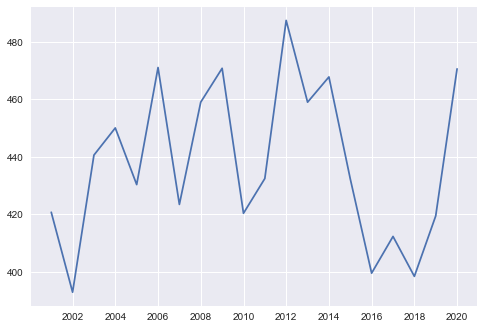

In [53]:
plt.plot(data)

In [56]:
alpha_01 = SimpleExpSmoothing(data).fit(0.1,optimized=False)
alpha_03 = SimpleExpSmoothing(data).fit(0.3,optimized=False)
alpha_05 = SimpleExpSmoothing(data).fit(0.5,optimized=False)
alpha_09 = SimpleExpSmoothing(data).fit(0.9,optimized=False)

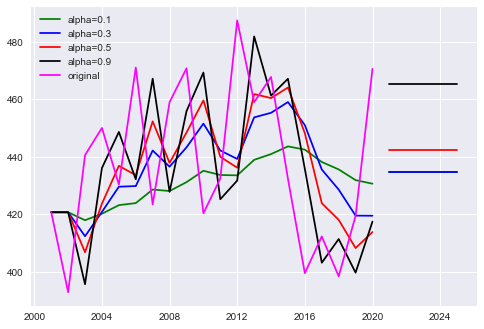

In [62]:
plt.plot(alpha_01.fittedvalues, color = 'g')
plt.plot(alpha_01.forecast(5).rename("alpha=0.1"),color='g',label='alpha=0.1')
plt.plot(alpha_03.fittedvalues, color = 'b')
plt.plot(alpha_03.forecast(5).rename("alpha=0.3"),color='b',label='alpha=0.3')
plt.plot(alpha_05.fittedvalues, color = 'r')
plt.plot(alpha_05.forecast(5).rename("alpha=0.5"),color='r',label='alpha=0.5')
plt.plot(alpha_09.fittedvalues, color = 'k')
plt.plot(alpha_09.forecast(5).rename("alpha=0.9"),color='k',label='alpha=0.9')
plt.plot(data,label='original',color='magenta')
plt.legend()

In [64]:
PMSE_01 = np.sum((data-alpha_01.fittedvalues)**2)/np.size(df)
PMSE_03 = np.sum((data-alpha_03.fittedvalues)**2)/np.size(df)
PMSE_05 = np.sum((data-alpha_05.fittedvalues)**2)/np.size(df)
PMSE_09 = np.sum((data-alpha_09.fittedvalues)**2)/np.size(df)
PMSE = [PMSE_01,PMSE_03,PMSE_05,PMSE_09]
alpha = [0.1,0.3,0.5,0.9]
for i in alpha:
    print("PMSE for alpha = {} is {}".format(i,PMSE[alpha.index(i)]))

PMSE for alpha = 0.1 is 850.1209244586237
PMSE for alpha = 0.3 is 835.4590391859932
PMSE for alpha = 0.5 is 866.8670308828634
PMSE for alpha = 0.9 is 1000.7915116140633


For this data, lowest predicted mean square is observed for alpha = 0.3 among the given values of alpha. Plot for which is denoted by the blue colour. And in constrast, original data is of magenta